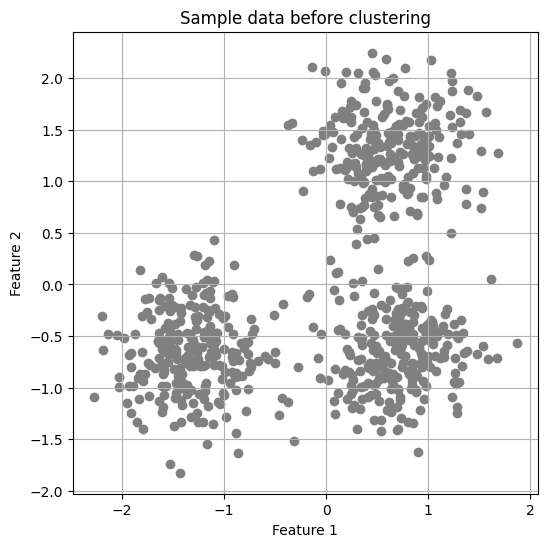

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


centers = [[1,1],[-1,-1],[1,-1]]
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.40, random_state=0)
X= StandardScaler().fit_transform(X)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],color='grey',marker='o')
plt.title('Sample data before clustering')
plt.grid(True)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


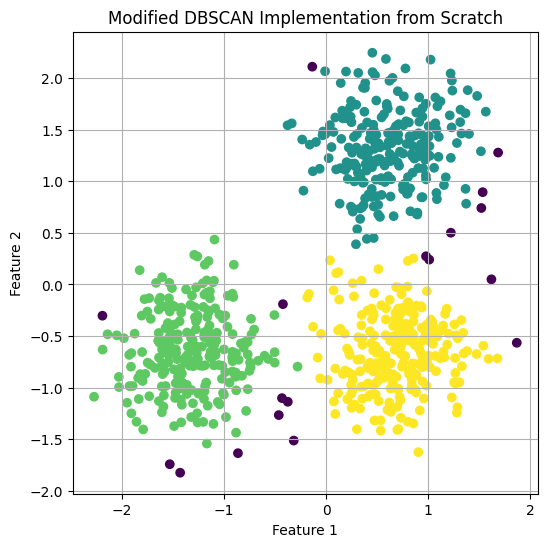

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

def scratch_dbscan(data, eps, min_samples):
    n_points = len(data)  # Number of data points
    labels = np.full(n_points, -1)  # Initialize all labels as -1 (noise)
    core_points = np.zeros(n_points, dtype=bool)  # Array to mark core points

    # Step 1: Identify core points
    for i in range(n_points):
        distances = np.linalg.norm(data - data[i], axis=1)  # Compute distances
        neighbors = np.where(distances <= eps)[0]  # Find neighbors within eps
        if len(neighbors) >= min_samples:
            core_points[i] = True  # Mark as core point

    cluster_id = 0
    visited = np.zeros(n_points, dtype=bool)  # Track visited points

    # Step 2: Cluster core points
    for i in range(n_points):
        if core_points[i] and not visited[i]:
            cluster_id += 1  # Start a new cluster
            labels[i] = cluster_id  # Assign cluster label
            visited[i] = True  # Mark as visited
            queue = [i]  # Initialize the queue with the current core point
            
            while queue:
                current_point = queue.pop(0)  # Get the next point from the queue
                distances = np.linalg.norm(data - data[current_point], axis=1)  # Compute distances
                neighbors = np.where(distances <= eps)[0]  # Find neighbors
                
                for neighbor in neighbors:
                    if core_points[neighbor] and not visited[neighbor]:
                        labels[neighbor] = cluster_id  # Assign cluster label
                        visited[neighbor] = True  # Mark as visited
                        queue.append(neighbor)  # Add to queue for further exploration

    # Step 3: Assign non-core points to clusters
    for i in range(n_points):
        if not core_points[i]:  # If it's not a core point
            distances = np.linalg.norm(data - data[i], axis=1)  # Compute distances
            neighbors = np.where(distances <= eps)[0]  # Find neighbors
            neighbor_clusters = set()  # Set to hold cluster labels of neighbors
            
            for neighbor in neighbors:
                if core_points[neighbor]:  # Check if the neighbor is a core point
                    label = labels[neighbor]  # Get the cluster label of the core point
                    neighbor_clusters.add(label)  # Add to the set of neighbor clusters
            
            if neighbor_clusters:  # If there are any clusters among neighbors
                # Randomly select one cluster to assign to the non-core point
                labels[i] = np.random.choice(list(neighbor_clusters))
            else:
                labels[i] = -1  # Remain as noise

    return labels


# Run the Modified DBSCAN
my_labels = scratch_dbscan(X, eps=0.3, min_samples=10)

# Plotting the results
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis', marker='o')
plt.title('Modified DBSCAN Implementation from Scratch')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
